In [94]:
import numpy as np
import tensorflow as tf
import random

def generate_dataset(size=10000, length=15, pattern="aabbb"):
    dataset = []
    labels = []
    half_size = size // 2
    
    # Generate strings that CONTAIN the pattern
    while len(dataset) < half_size:
        s = "".join(random.choice("abcd") for _ in range(length))
        if pattern in s:
            dataset.append(s)
            labels.append(1)
    
    # Generate strings that DO NOT CONTAIN the pattern
    while len(dataset) < size:
        s = "".join(random.choice("abcd") for _ in range(length))
        if pattern not in s:
            dataset.append(s)
            labels.append(0)
    
    return dataset, labels

def encode_strings(strings):
    char_map = {'a': 0, 'b': 1, 'c': 2, 'd': 3}
    X = []
    for s in strings:
        arr = np.zeros((len(s), 4), dtype=np.float32)
        for i, ch in enumerate(s):
            arr[i, char_map[ch]] = 1.0
        X.append(arr)
    return np.array(X, dtype=np.float32)

dataset, labels = generate_dataset()
combined = list(zip(dataset, labels))
random.shuffle(combined)

train_size = 7000
train_data = combined[:train_size]
test_data = combined[train_size:]

X_train = encode_strings([t[0] for t in train_data])
y_train = np.array([t[1] for t in train_data], dtype=np.float32)
X_test = encode_strings([t[0] for t in test_data])
y_test = np.array([t[1] for t in test_data], dtype=np.float32)

In [95]:
model_single = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=1, kernel_size=5, activation='relu', input_shape=(15,4)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_single.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_single.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=250, batch_size=64)

conv_layer = model_single.layers[0]
filters, biases = conv_layer.get_weights()

print("Filter shape:", filters.shape)  
print("Filter weights:\n", filters[..., 0])
print("Filter bias:\n", biases)

Epoch 1/250
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5356 - loss: 0.6989 - val_accuracy: 0.5467 - val_loss: 0.6841
Epoch 2/250
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - accuracy: 0.5780 - loss: 0.6696 - val_accuracy: 0.6090 - val_loss: 0.6504
Epoch 3/250
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.6288 - loss: 0.6363 - val_accuracy: 0.6937 - val_loss: 0.6004
Epoch 4/250
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - accuracy: 0.7271 - loss: 0.5798 - val_accuracy: 0.7950 - val_loss: 0.5440
Epoch 5/250
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - accuracy: 0.8166 - loss: 0.5245 - val_accuracy: 0.8417 - val_loss: 0.4922
Epoch 6/250
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - accuracy: 0.8538 - loss: 0.4762 - val_accuracy: 0.8847 - val_loss: 0.4457
Epoch 7/250
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - accuracy: 0.8947 - loss: 0.4237 - val_accuracy: 0.9080 - val_loss: 0.4037
Epoch 8/250
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.9053 - loss: 0.3

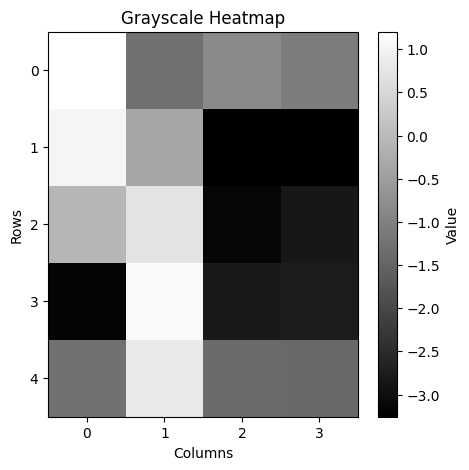

In [ ]:
import matplotlib.pyplot as plt

data = filters[..., 0]

plt.figure(figsize=(5, 5))
plt.imshow(data, cmap='gray', aspect='auto')
plt.colorbar(label='Value')
plt.title("Grayscale Heatmap")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

In [97]:
model_complex = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=128, kernel_size=5, activation='relu', input_shape=(15,4)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=512, kernel_size=4, activation='relu'),

    tf.keras.layers.GlobalMaxPooling1D(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_complex.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_complex.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64)

loss_single, acc_single = model_single.evaluate(X_test, y_test, verbose=0)
loss_complex, acc_complex = model_complex.evaluate(X_test, y_test, verbose=0)

print('\n\n\n\n\n\n\n')
print("Single-filter CNN -> Loss:", loss_single, " Accuracy:", acc_single)
print("Complex CNN       -> Loss:", loss_complex, " Accuracy:", acc_complex)

Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8357 - loss: 0.3521 - val_accuracy: 0.9907 - val_loss: 0.0261
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9918 - loss: 0.0283 - val_accuracy: 0.9970 - val_loss: 0.0111
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9953 - loss: 0.0159 - val_accuracy: 0.9987 - val_loss: 0.0058
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9944 - loss: 0.0188 - val_accuracy: 0.9990 - val_loss: 0.0059
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9973 - loss: 0.0082 - val_accuracy: 0.9933 - val_loss: 0.0199
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9974 - loss: 0.0064 - val_accuracy: 0.9993 - val_loss: 0.0042
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9994 - loss: 0.0031 - val_accuracy: 0.9993 - val_loss: 0.0050
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9988 - loss: 0.0043 - val_accuracy: 0.